In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
dataset = pd.read_csv('datasets/50_Startups.csv')

In [3]:
x = dataset.iloc[:, :-1].values
y = dataset['Profit'].values.reshape(-1, 1)

In [4]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(drop='first'), [3])], remainder='passthrough')
x = np.array(ct.fit_transform(x))

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [6]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [7]:
y_pred = model.predict(x_test)

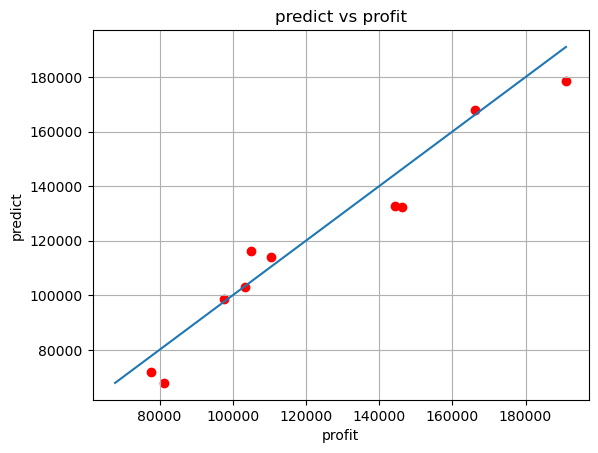

In [8]:
plt.scatter(y_test, y_pred, color='red')
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val])
plt.xlabel('profit')
plt.ylabel('predict')
plt.title('predict vs profit')
plt.grid(True)
plt.show()

In [9]:
acc = r2_score(y_train, model.predict(x_train))
acc

0.9501847627493607

In [10]:
acc2 = r2_score(y_test, model.predict(x_test))
print(acc2)

0.9347068473282446


In [16]:
# state
# 1.(California)
# 2.(Florida)
# 3.(New York)

state_choice = int(input("(1-3):"))

if state_choice == 1:  # California
    state_encoded = [0, 0]  # drop='first'
elif state_choice == 2:  # Florida
    state_encoded = [1, 0]
elif state_choice == 3:  # New York
    state_encoded = [0, 1]


rd_spend = float(input("rd spend"))
admin = float(input("admin"))
marketing = float(input("marketing"))


input_data = np.array([ state_encoded + [rd_spend, admin, marketing]])
predicted_profit = model.predict(input_data)

print(predicted_profit)

state
1.(California)
2.(Florida)
3.(New York)
[[192558.36632044]]
